# Model evaluation

The model evaluation will be carried out in several phases. First, I will deal with the class imbalance by undersampling the benign (good) sites. Then, I’ll apply SMOTE to oversample the malicious URLs. Although SMOTE creates new samples by interpolating between existing ones, I’m concerned it might still lead to some overfitting. Since the synthetic data is based on existing values, it could make the dataset less diverse and reduce the uniqueness of the original malicious examples. Thus, I will evaluate this hypothesis while comparing the results. Moreover, the algorithms evaluated are the following:
- Random Forest
- XGB Classifier
- Light GBM
- Adaboost
- Logisitc Regression
- Linear SVM
- GaussianNB

Each model will be trained by means of a pipeline which will take care of scaling (if necessary), sampling and feature selection. Moreover each model will be evaluated using a stratified cross validation, and later all models will be compared by statistical testing. Finally the best model will eventually undergo a hyperparameters tuning phase, further increasing its performace.

In [4]:
import pandas as pd
df = pd.read_csv('dataset/all_feats1.csv')

## Undersampling

In [9]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import numpy as np

X = df.drop(columns=['Label', 'URL'])
y = df['Label'].apply(lambda x: 1 if x == 'bad' else 0)

undersampler = RandomUnderSampler(random_state=21)
feature_selector = SelectKBest(score_func=mutual_info_classif, k=35)

models = {
    'Random Forest': RandomForestClassifier(random_state=21),
    'XGBoost': XGBClassifier(random_state=21),
    'LightGBM': LGBMClassifier(random_state=21),
    'AdaBoost': AdaBoostClassifier(random_state=21)
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

results = {}

for model_name, model in models.items():
    print(f"\n=== Evaluating {model_name} ===")
    
    pipe = Pipeline([
        ('undersample', undersampler),
        ('feature_selection', feature_selector),
        ('classification', model)
    ])
    
    # cross-validation
    cv_results = cross_validate(pipe, X, y, cv=cv, scoring=scoring, return_train_score=False)
    
    results[model_name] = cv_results

    # per-fold scores
    for i in range(cv.get_n_splits()):
        print(f"\n  Fold {i+1}:")
        for metric in scoring.keys():
            print(f"    {metric}: {cv_results[f'test_{metric}'][i]:.4f}")

    # average scores
    print(f"\n  Averages for {model_name}:")
    for metric in scoring.keys():
        avg_score = np.mean(cv_results[f'test_{metric}'])
        print(f"    {metric}: {avg_score:.4f}")

# save average to dataframe
results_df = pd.DataFrame({
    (model_name, metric): np.mean(cv_results[f'test_{metric}']) 
    for model_name, cv_results in results.items() 
    for metric in scoring.keys()
}, index=['Mean'])

print("\n=== Final Averaged Results ===")
print(results_df.T)


=== Evaluating Random Forest ===

  Fold 1:
    accuracy: 0.8831
    f1: 0.8231
    precision: 0.7747
    recall: 0.8780
    roc_auc: 0.8817

  Fold 2:
    accuracy: 0.8826
    f1: 0.8226
    precision: 0.7735
    recall: 0.8784
    roc_auc: 0.8815

  Fold 3:
    accuracy: 0.8831
    f1: 0.8225
    precision: 0.7765
    recall: 0.8742
    roc_auc: 0.8807

  Fold 4:
    accuracy: 0.8855
    f1: 0.8267
    precision: 0.7782
    recall: 0.8816
    roc_auc: 0.8844

  Fold 5:
    accuracy: 0.8863
    f1: 0.8270
    precision: 0.7823
    recall: 0.8771
    roc_auc: 0.8838

  Fold 6:
    accuracy: 0.8836
    f1: 0.8233
    precision: 0.7771
    recall: 0.8754
    roc_auc: 0.8814

  Fold 7:
    accuracy: 0.8823
    f1: 0.8219
    precision: 0.7734
    recall: 0.8769
    roc_auc: 0.8808

  Fold 8:
    accuracy: 0.8836
    f1: 0.8234
    precision: 0.7769
    recall: 0.8758
    roc_auc: 0.8815

  Fold 9:
    accuracy: 0.8821
    f1: 0.8220
    precision: 0.7718
    recall: 0.8793
    roc_auc: 0

C:\Users\ansru\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ansru\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ansru\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ansru\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ans


  Fold 1:
    accuracy: 0.7796
    f1: 0.6846
    precision: 0.6149
    recall: 0.7721
    roc_auc: 0.7775

  Fold 2:
    accuracy: 0.7839
    f1: 0.6858
    precision: 0.6240
    recall: 0.7612
    roc_auc: 0.7777

  Fold 3:
    accuracy: 0.7828
    f1: 0.6870
    precision: 0.6205
    recall: 0.7694
    roc_auc: 0.7791

  Fold 4:
    accuracy: 0.7815
    f1: 0.6895
    precision: 0.6159
    recall: 0.7830
    roc_auc: 0.7819

  Fold 5:
    accuracy: 0.7813
    f1: 0.6904
    precision: 0.6148
    recall: 0.7872
    roc_auc: 0.7829

  Fold 6:
    accuracy: 0.7779
    f1: 0.6830
    precision: 0.6120
    recall: 0.7727
    roc_auc: 0.7764

  Fold 7:
    accuracy: 0.7809
    f1: 0.6860
    precision: 0.6168
    recall: 0.7726
    roc_auc: 0.7786

  Fold 8:
    accuracy: 0.7869
    f1: 0.6898
    precision: 0.6281
    recall: 0.7650
    roc_auc: 0.7809

  Fold 9:
    accuracy: 0.7778
    f1: 0.6874
    precision: 0.6092
    recall: 0.7885
    roc_auc: 0.7808

  Fold 10:
    accuracy: 0.

Next, are printed those models which benefit from scalarization: logistic regression, linear SVM, GaussianNB.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd
import numpy as np

from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

X = df.drop(columns=['Label', 'URL'])
y = df['Label'].apply(lambda x: 1 if x == 'bad' else 0)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=21),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=21),
    'GaussianNB': GaussianNB()
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)
}

# cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

all_results = {}

for model_name, model in models.items():
    print(f"\n========== Evaluating {model_name} ==========")

    pipe = Pipeline([
        ('undersample', RandomUnderSampler(random_state=21)),
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=35)),
        ('classifier', model)
    ])

    scores = cross_validate(
        pipe, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_estimator=False
    )
    
    all_results[model_name] = scores

    # per-fold results
    for fold in range(cv.get_n_splits()):
        print(f"\n-- Fold {fold + 1} --")
        for metric in scoring:
            score_key = f'test_{metric}'
            print(f"{metric}: {scores[score_key][fold]:.4f}")

print("\n\n========== Final Average Scores ==========")
final_df = []

for model_name, scores in all_results.items():
    for metric in scoring:
        avg_score = np.mean(scores[f'test_{metric}'])
        final_df.append((model_name, metric, avg_score))

results_df = pd.DataFrame(final_df, columns=['Model', 'Metric', 'Average Score'])
print(results_df)


C:\Users\ansru\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



========== Evaluating Logistic Regression ==========

-- Fold 1 --
accuracy: 0.7159
f1: 0.6044
precision: 0.5315
recall: 0.7003
roc_auc: 0.8172

-- Fold 2 --
accuracy: 0.7150
f1: 0.6032
precision: 0.5303
recall: 0.6992
roc_auc: 0.8170

-- Fold 3 --
accuracy: 0.7163
f1: 0.6054
precision: 0.5319
recall: 0.7025
roc_auc: 0.8164

-- Fold 4 --
accuracy: 0.7213
f1: 0.6116
precision: 0.5381
recall: 0.7084
roc_auc: 0.8222

-- Fold 5 --
accuracy: 0.7161
f1: 0.6035
precision: 0.5318
recall: 0.6974
roc_auc: 0.8153

-- Fold 6 --
accuracy: 0.7165
f1: 0.6038
precision: 0.5324
recall: 0.6975
roc_auc: 0.8172

-- Fold 7 --
accuracy: 0.7185
f1: 0.6063
precision: 0.5349
recall: 0.6998
roc_auc: 0.8183

-- Fold 8 --
accuracy: 0.7275
f1: 0.5999
precision: 0.5502
recall: 0.6594
roc_auc: 0.8161

-- Fold 9 --
accuracy: 0.7261
f1: 0.6083
precision: 0.5460
recall: 0.6868
roc_auc: 0.8246

-- Fold 10 --
accuracy: 0.7191
f1: 0.6075
precision: 0.5355
recall: 0.7020
roc_auc: 0.8189

========== Evaluating Linear SVM =

I will now use the Wilcoxon test to assess the statiscal significance of the results.

In [3]:
from scipy.stats import wilcoxon
import numpy as np
import itertools

f1_scores = {
    'Random Forest': [0.8231, 0.8226, 0.8225, 0.8267, 0.8270, 0.8233, 0.8219, 0.8234, 0.8220, 0.8190],
    'XGBoost': [0.7977, 0.7998, 0.7977, 0.8049, 0.8037, 0.7971, 0.7977, 0.7980, 0.7979, 0.7972],
    'LightGBM': [0.7863, 0.7835, 0.7831, 0.7867, 0.7885, 0.7823, 0.7824, 0.7825, 0.7864, 0.7831],
    'AdaBoost': [0.6846, 0.6858, 0.6870, 0.6895, 0.6904, 0.6830, 0.6860, 0.6898, 0.6874, 0.6942],
    'Logistic Regression': [0.6044, 0.6032, 0.6054, 0.6116, 0.6035, 0.6038, 0.6063, 0.5999, 0.6083, 0.6075],
    'Linear SVM': [0.6003, 0.6002, 0.5998, 0.6086, 0.5963, 0.6009, 0.6021, 0.6019, 0.5994, 0.6017],
    'GaussianNB': [0.3982, 0.3902, 0.3835, 0.3918, 0.3867, 0.4065, 0.3891, 0.4100, 0.4048, 0.4078]
}

model_names = list(f1_scores.keys())
n_models = len(model_names)

# Bonferroni correction
alpha = 0.05
n_comparisons = n_models * (n_models - 1) // 2
critical_p = alpha / n_comparisons

wins = {model: 0 for model in model_names}

# pairwise comparisons
for m1, m2 in itertools.combinations(model_names, 2):
    stat, p = wilcoxon(f1_scores[m1], f1_scores[m2])
    if p < critical_p:
        mean1 = np.mean(f1_scores[m1])
        mean2 = np.mean(f1_scores[m2])
        if mean1 > mean2:
            wins[m1] += 1
        else:
            wins[m2] += 1
        print(f"{m1} vs {m2}: p = {p:.5f} → significant. Winner: {m1 if mean1 > mean2 else m2}")
    else:
        print(f"{m1} vs {m2}: p = {p:.5f} → not significant.")

max_wins = max(wins.values())
best_models = [model for model, win in wins.items() if win == max_wins]

print("\n=== Statistically Best Performing Model(s) ===")
for model in best_models:
    print(f"{model} (wins: {wins[model]})")


Random Forest vs XGBoost: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs LightGBM: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs AdaBoost: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs Logistic Regression: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs Linear SVM: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs GaussianNB: p = 0.00195 → significant. Winner: Random Forest
XGBoost vs LightGBM: p = 0.00195 → significant. Winner: XGBoost
XGBoost vs AdaBoost: p = 0.00195 → significant. Winner: XGBoost
XGBoost vs Logistic Regression: p = 0.00195 → significant. Winner: XGBoost
XGBoost vs Linear SVM: p = 0.00195 → significant. Winner: XGBoost
XGBoost vs GaussianNB: p = 0.00195 → significant. Winner: XGBoost
LightGBM vs AdaBoost: p = 0.00195 → significant. Winner: LightGBM
LightGBM vs Logistic Regression: p = 0.00195 → significant. Winner: LightGBM
LightGBM vs Linear SVM: p = 0.00195 → significant. W

## SMOTE

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import numpy as np

X = df.drop(columns=['Label', 'URL'])
y = df['Label'].apply(lambda x: 1 if x == 'bad' else 0)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=21, n_jobs=-1),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=21, n_jobs=-1),
    'LightGBM': LGBMClassifier(random_state=21, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(random_state=21)
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)
}

# cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

all_results = {}

for model_name, model in models.items():
    print(f"\n========== Evaluating {model_name} ==========")

    pipe = Pipeline([
        ('oversample', SMOTE(sampling_strategy='minority', random_state=21)),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=35)),
        ('classifier', model)
    ])

    scores = cross_validate(
        pipe, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_estimator=False
    )
    
    all_results[model_name] = scores

    for fold in range(cv.get_n_splits()):
        print(f"\n-- Fold {fold + 1} --")
        for metric in scoring:
            score_key = f'test_{metric}'
            print(f"{metric}: {scores[score_key][fold]:.4f}")

print("\n\n========== Final Average Scores ==========")
final_df = []

for model_name, scores in all_results.items():
    for metric in scoring:
        avg_score = np.mean(scores[f'test_{metric}'])
        final_df.append((model_name, metric, avg_score))

results_df = pd.DataFrame(final_df, columns=['Model', 'Metric', 'Average Score'])
print(results_df)

C:\Users\ansru\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



========== Evaluating Random Forest ==========

-- Fold 1 --
accuracy: 0.8898
f1: 0.8270
precision: 0.8047
recall: 0.8506
roc_auc: 0.9539

-- Fold 2 --
accuracy: 0.8902
f1: 0.8270
precision: 0.8078
recall: 0.8471
roc_auc: 0.9523

-- Fold 3 --
accuracy: 0.8900
f1: 0.8266
precision: 0.8080
recall: 0.8460
roc_auc: 0.9531

-- Fold 4 --
accuracy: 0.8920
f1: 0.8299
precision: 0.8106
recall: 0.8500
roc_auc: 0.9550

-- Fold 5 --
accuracy: 0.8928
f1: 0.8309
precision: 0.8128
recall: 0.8497
roc_auc: 0.9555

-- Fold 6 --
accuracy: 0.8906
f1: 0.8270
precision: 0.8102
recall: 0.8445
roc_auc: 0.9545

-- Fold 7 --
accuracy: 0.8909
f1: 0.8282
precision: 0.8086
recall: 0.8487
roc_auc: 0.9539

-- Fold 8 --
accuracy: 0.8902
f1: 0.8264
precision: 0.8094
recall: 0.8441
roc_auc: 0.9528

-- Fold 9 --
accuracy: 0.8904
f1: 0.8279
precision: 0.8063
recall: 0.8506
roc_auc: 0.9536

-- Fold 10 --
accuracy: 0.8888
f1: 0.8249
precision: 0.8052
recall: 0.8455
roc_auc: 0.9526

========== Evaluating XGBoost ==========

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE  # <-- CHANGED
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

X = df.drop(columns=['Label', 'URL'])
y = df['Label'].apply(lambda x: 1 if x == 'bad' else 0)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=21),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=21),
    'GaussianNB': GaussianNB()
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)
}

# cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

all_results = {}

for model_name, model in models.items():
    print(f"\n========== Evaluating {model_name} ==========")

    pipe = Pipeline([
        ('oversample', SMOTE(random_state=21)), 
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=35)),
        ('classifier', model)
    ])

    scores = cross_validate(
        pipe, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_estimator=False
    )
    
    all_results[model_name] = scores

    for fold in range(cv.get_n_splits()):
        print(f"\n-- Fold {fold + 1} --")
        for metric in scoring:
            score_key = f'test_{metric}'
            print(f"{metric}: {scores[score_key][fold]:.4f}")

print("\n\n========== Final Average Scores ==========")
final_df = []

for model_name, scores in all_results.items():
    for metric in scoring:
        avg_score = np.mean(scores[f'test_{metric}'])
        final_df.append((model_name, metric, avg_score))

results_df = pd.DataFrame(final_df, columns=['Model', 'Metric', 'Average Score'])
print(results_df)

C:\Users\ansru\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



========== Evaluating Logistic Regression ==========

-- Fold 1 --
accuracy: 0.7219
f1: 0.6123
precision: 0.5388
recall: 0.7090
roc_auc: 0.8164

-- Fold 2 --
accuracy: 0.7201
f1: 0.6112
precision: 0.5365
recall: 0.7100
roc_auc: 0.8165

-- Fold 3 --
accuracy: 0.7165
f1: 0.5986
precision: 0.5332
recall: 0.6822
roc_auc: 0.8055

-- Fold 4 --
accuracy: 0.7265
f1: 0.6181
precision: 0.5445
recall: 0.7147
roc_auc: 0.8211

-- Fold 5 --
accuracy: 0.7319
f1: 0.6156
precision: 0.5537
recall: 0.6932
roc_auc: 0.8234

-- Fold 6 --
accuracy: 0.7342
f1: 0.6123
precision: 0.5585
recall: 0.6775
roc_auc: 0.8177

-- Fold 7 --
accuracy: 0.7245
f1: 0.6137
precision: 0.5424
recall: 0.7066
roc_auc: 0.8175

-- Fold 8 --
accuracy: 0.7209
f1: 0.6111
precision: 0.5376
recall: 0.7079
roc_auc: 0.8160

-- Fold 9 --
accuracy: 0.7211
f1: 0.6104
precision: 0.5381
recall: 0.7053
roc_auc: 0.8152

-- Fold 10 --
accuracy: 0.7201
f1: 0.6050
precision: 0.5374
recall: 0.6922
roc_auc: 0.8080

========== Evaluating Linear SVM =

In [5]:
from scipy.stats import wilcoxon
import numpy as np
import itertools

f1_scores = {
    'Random Forest': [0.8270, 0.8270, 0.8266, 0.8299, 0.8309, 0.8270, 0.8282, 0.8264, 0.8279, 0.8249],
    'XGBoost': [0.7997, 0.7966, 0.7964, 0.8044, 0.8013, 0.7989, 0.7986, 0.7949, 0.7999, 0.7963],
    'LightGBM':[0.7838, 0.7800, 0.7804, 0.7873, 0.7856, 0.7823, 0.7809, 0.7814, 0.7819, 0.7816],
    'AdaBoost': [0.6901, 0.6822, 0.6923, 0.6912, 0.6908, 0.6855, 0.6916, 0.6904, 0.6892, 0.6911],
    'Logistic Regression': [0.6123, 0.6112, 0.5986, 0.6181, 0.6156, 0.6123, 0.6137, 0.6111, 0.6104, 0.6050],
    'Linear SVM': [0.6066, 0.6071, 0.5907, 0.6129, 0.6054, 0.6072, 0.6080, 0.6070, 0.6073, 0.5944],
    'GaussianNB': [0.4095, 0.4021, 0.3785, 0.4058, 0.4226, 0.4330, 0.4017, 0.4026, 0.4073, 0.4132]
}

model_names = list(f1_scores.keys())
n_models = len(model_names)

# Bonferroni correction
alpha = 0.05
n_comparisons = n_models * (n_models - 1) // 2
critical_p = alpha / n_comparisons

wins = {model: 0 for model in model_names}

# pairwise comparisons
for m1, m2 in itertools.combinations(model_names, 2):
    stat, p = wilcoxon(f1_scores[m1], f1_scores[m2])
    if p < critical_p:
        mean1 = np.mean(f1_scores[m1])
        mean2 = np.mean(f1_scores[m2])
        if mean1 > mean2:
            wins[m1] += 1
        else:
            wins[m2] += 1
        print(f"{m1} vs {m2}: p = {p:.5f} → significant. Winner: {m1 if mean1 > mean2 else m2}")
    else:
        print(f"{m1} vs {m2}: p = {p:.5f} → not significant.")

max_wins = max(wins.values())
best_models = [model for model, win in wins.items() if win == max_wins]

print("\n=== Statistically Best Performing Model(s) ===")
for model in best_models:
    print(f"{model} (wins: {wins[model]})")


Random Forest vs XGBoost: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs LightGBM: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs AdaBoost: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs Logistic Regression: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs Linear SVM: p = 0.00195 → significant. Winner: Random Forest
Random Forest vs GaussianNB: p = 0.00195 → significant. Winner: Random Forest
XGBoost vs LightGBM: p = 0.00195 → significant. Winner: XGBoost
XGBoost vs AdaBoost: p = 0.00195 → significant. Winner: XGBoost
XGBoost vs Logistic Regression: p = 0.00195 → significant. Winner: XGBoost
XGBoost vs Linear SVM: p = 0.00195 → significant. Winner: XGBoost
XGBoost vs GaussianNB: p = 0.00195 → significant. Winner: XGBoost
LightGBM vs AdaBoost: p = 0.00195 → significant. Winner: LightGBM
LightGBM vs Logistic Regression: p = 0.00195 → significant. Winner: LightGBM
LightGBM vs Linear SVM: p = 0.00195 → significant. W

We can see that both among the undersampling models and the oversampling models, the best one is Random Forest

In order to get a fair comparison among these 2 models of Random Forest, I evaluated them on the same subset of features and on the same testing set.

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from scipy.stats import wilcoxon

X = df.drop(columns=['Label', 'URL'])
y = df['Label'].apply(lambda x: 1 if x == 'bad' else 0)

f1_scores_under = []
f1_scores_smote = []

# 10-fold CV with fixed random state
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    selector = SelectKBest(score_func=mutual_info_classif, k=35)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # undersampling
    rus = RandomUnderSampler(random_state=21)
    X_train_under, y_train_under = rus.fit_resample(X_train_selected, y_train)
    model_under = RandomForestClassifier(random_state=21, n_jobs=-1)
    model_under.fit(X_train_under, y_train_under)
    y_pred_under = model_under.predict(X_test_selected)
    f1_under = f1_score(y_test, y_pred_under)
    f1_scores_under.append(f1_under)

    # smote
    smote = SMOTE(random_state=21)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)
    model_smote = RandomForestClassifier(random_state=21, n_jobs=-1)
    model_smote.fit(X_train_smote, y_train_smote)
    y_pred_smote = model_smote.predict(X_test_selected)
    f1_smote = f1_score(y_test, y_pred_smote)
    f1_scores_smote.append(f1_smote)

# wilcoxon
stat, p = wilcoxon(f1_scores_under, f1_scores_smote)
print(f"Wilcoxon test statistic: {stat:.4f}, p-value: {p:.4f}")

# Average F1 scores
print(f"\nAverage F1 (undersampling): {np.mean(f1_scores_under):.4f}")
print(f"Average F1 (SMOTE): {np.mean(f1_scores_smote):.4f}")

Wilcoxon test statistic: 0.0000, p-value: 0.0020

Average F1 (undersampling): 0.8229
Average F1 (SMOTE): 0.8306


=== UNDERSAMPLING ===
              precision    recall  f1-score   support

           0     0.9408    0.8827    0.9108     78579
           1     0.7702    0.8762    0.8198     35265

    accuracy                         0.8807    113844
   macro avg     0.8555    0.8794    0.8653    113844
weighted avg     0.8880    0.8807    0.8826    113844

ROC-AUC: 0.9521435747683022

=== SMOTE ===
              precision    recall  f1-score   support

           0     0.9223    0.9224    0.9223     78579
           1     0.8270    0.8269    0.8270     35265

    accuracy                         0.8928    113844
   macro avg     0.8747    0.8746    0.8747    113844
weighted avg     0.8928    0.8928    0.8928    113844

ROC-AUC: 0.9530139603790738

=== Summary Table ===
            Metric  Undersampling      SMOTE
0     Recall (bad)         0.8762     0.8269
1  Precision (bad)         0.7702     0.8270
2         F1 (bad)         0.8198     0.8270
3         F2 (bad)         0.8527     0.8269
4    

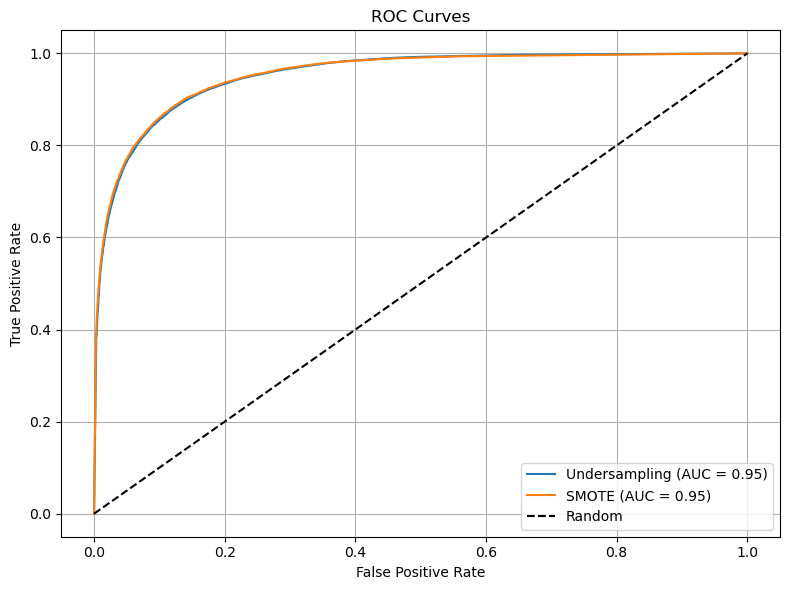

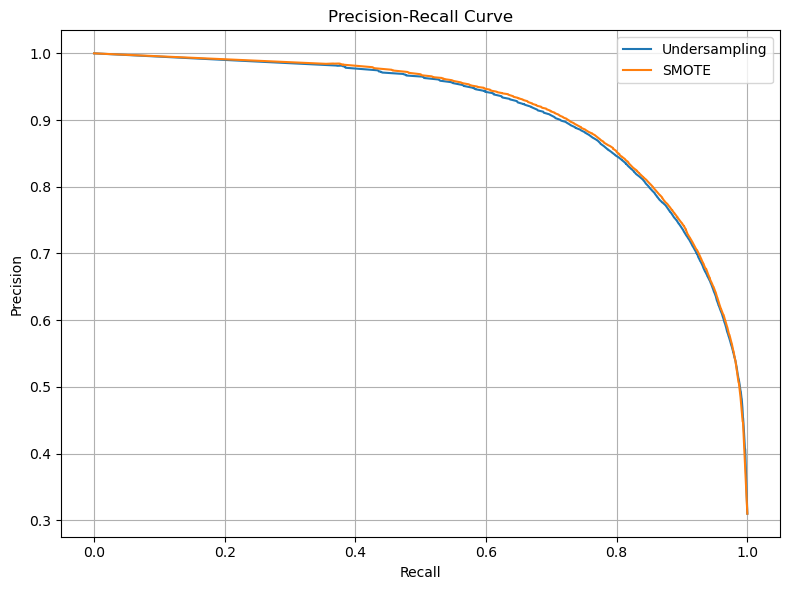

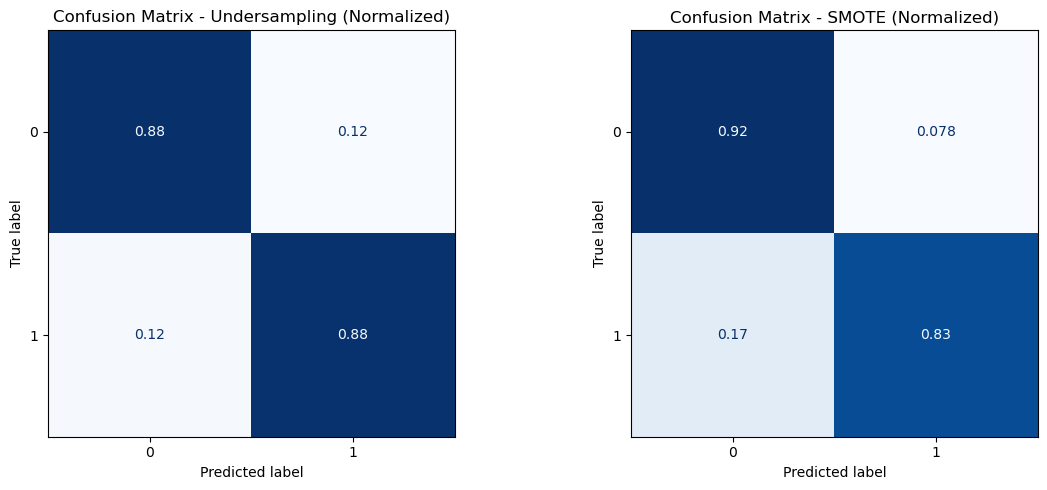

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score, roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, classification_report, fbeta_score
)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Label', 'URL'])
y = df['Label'].map({'good': 0, 'bad': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=21
)

selector = SelectKBest(score_func=mutual_info_classif, k=35)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

rus = RandomUnderSampler(random_state=21)
X_train_under, y_train_under = rus.fit_resample(X_train_sel, y_train)
model_under = RandomForestClassifier(random_state=21, n_jobs=-1)
model_under.fit(X_train_under, y_train_under)
y_pred_under = model_under.predict(X_test_sel)
y_proba_under = model_under.predict_proba(X_test_sel)[:, 1]

smote = SMOTE(random_state=21)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sel, y_train)
model_smote = RandomForestClassifier(random_state=21, n_jobs=-1)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test_sel)
y_proba_smote = model_smote.predict_proba(X_test_sel)[:, 1]

print("=== UNDERSAMPLING ===")
print(classification_report(y_test, y_pred_under, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_under))

print("\n=== SMOTE ===")
print(classification_report(y_test, y_pred_smote, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))

# F2 + FN
f2_under = fbeta_score(y_test, y_pred_under, beta=2, pos_label=1)
f2_smote = fbeta_score(y_test, y_pred_smote, beta=2, pos_label=1)

cm_under = confusion_matrix(y_test, y_pred_under)
cm_smote = confusion_matrix(y_test, y_pred_smote)

fn_under = cm_under[1, 0]  # actual bad, predicted good
fn_smote = cm_smote[1, 0]

results = pd.DataFrame({
    'Metric': ['Recall (bad)', 'Precision (bad)', 'F1 (bad)', 'F2 (bad)', 'ROC-AUC', 'False Negatives'],
    'Undersampling': [
        recall_score(y_test, y_pred_under, pos_label=1),
        precision_score(y_test, y_pred_under, pos_label=1),
        f1_score(y_test, y_pred_under, pos_label=1),
        f2_under,
        roc_auc_score(y_test, y_proba_under),
        fn_under
    ],
    'SMOTE': [
        recall_score(y_test, y_pred_smote, pos_label=1),
        precision_score(y_test, y_pred_smote, pos_label=1),
        f1_score(y_test, y_pred_smote, pos_label=1),
        f2_smote,
        roc_auc_score(y_test, y_proba_smote),
        fn_smote
    ]
})

print("\n=== Summary Table ===")
print(results.round(4))

# ROC curves
fpr_under, tpr_under, _ = roc_curve(y_test, y_proba_under)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_under, tpr_under, label=f'Undersampling (AUC = {roc_auc_score(y_test, y_proba_under):.2f})')
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE (AUC = {roc_auc_score(y_test, y_proba_smote):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall curve
prec_under, rec_under, _ = precision_recall_curve(y_test, y_proba_under)
prec_smote, rec_smote, _ = precision_recall_curve(y_test, y_proba_smote)

plt.figure(figsize=(8, 6))
plt.plot(rec_under, prec_under, label='Undersampling')
plt.plot(rec_smote, prec_smote, label='SMOTE')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_under, ax=axs[0], colorbar=False, normalize='true', cmap='Blues')
axs[0].set_title("Confusion Matrix - Undersampling (Normalized)")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, ax=axs[1], colorbar=False, normalize='true', cmap='Blues')
axs[1].set_title("Confusion Matrix - SMOTE (Normalized)")

plt.tight_layout()
plt.show()

## Hyper parameters tuning

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import make_scorer, recall_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

X = df.drop(columns=["Label", "URL"])
y = df["Label"].apply(lambda x: 1 if x == "bad" else 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=21
)

selector = SelectKBest(score_func=mutual_info_classif, k=35)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

rus = RandomUnderSampler(random_state=21)
X_train_bal, y_train_bal = rus.fit_resample(X_train_selected, y_train)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scoring = {
    'recall': make_scorer(recall_score),
    'roc_auc': 'roc_auc'
}

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=21, n_jobs=-1),
    param_grid=param_grid,
    scoring=scoring,
    refit='recall',
    cv=skf,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_bal, y_train_bal)

print("Best parameters:", grid_search.best_params_)
print("Best Recall Score (CV):", grid_search.cv_results_["mean_test_recall"][grid_search.best_index_])
print("ROC AUC for best model (CV):", grid_search.cv_results_["mean_test_roc_auc"][grid_search.best_index_])

y_pred = grid_search.best_estimator_.predict(X_test_selected)
recall_test = recall_score(y_test, y_pred)
print("Test Recall Score:", recall_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall Score (CV): 0.8836578050711742
ROC AUC for best model (CV): 0.9561791157874735
Test Recall Score: 0.8843329079824188


In [3]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Label", "URL"])
y = df["Label"].apply(lambda x: 1 if x == "bad" else 0)

X_train, _, y_train, _ = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=21
)

# feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=35)
selector.fit(X_train, y_train)

# selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:")
print(selected_features.tolist())

Selected Features:
['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_and_url', 'qty_plus_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain', 'domain_length', 'has_dir', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_plus_directory', 'directory_length', 'has_file', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'file_length', 'has_params', 'qty_dot_params', 'qty_slash_params', 'qty_questionmark_params', 'qty_equal_params', 'qty_and_params', 'params_length', 'tld_present_params', 'qty_params', 'shannon_entropy']


=== Evaluation Metrics ===
Accuracy      : 0.8835
Precision     : 0.7732
Recall        : 0.8829
F1 Score      : 0.8244
ROC AUC Score : 0.9568


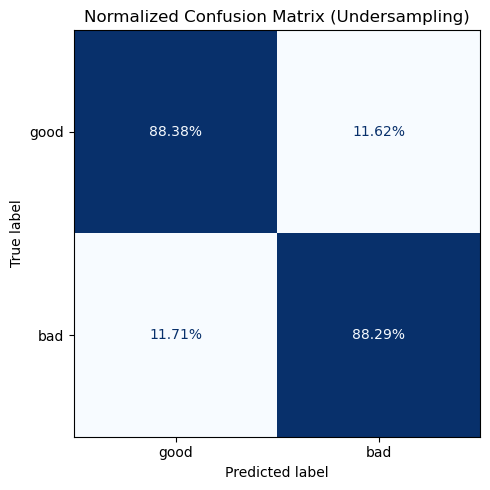

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import joblib

selected_features = [
    'qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url',
    'qty_and_url', 'qty_plus_url', 'qty_tld_url', 'length_url', 'qty_dot_domain',
    'qty_hyphen_domain', 'qty_vowels_domain', 'domain_length', 'has_dir', 'qty_dot_directory',
    'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_plus_directory',
    'directory_length', 'has_file', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
    'file_length', 'has_params', 'qty_dot_params', 'qty_slash_params', 'qty_questionmark_params',
    'qty_equal_params', 'qty_and_params', 'params_length', 'tld_present_params', 'qty_params',
    'shannon_entropy'
]

X = df[selected_features]
y = df["Label"].apply(lambda x: 1 if x == "bad" else 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=21
)

rus = RandomUnderSampler(random_state=21)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=21,
    n_jobs=-1
)

rf_model.fit(X_train_bal, y_train_bal)

joblib.dump(rf_model, 'random_forest_model.pkl')

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("=== Evaluation Metrics ===")
print(f"Accuracy      : {acc:.4f}")
print(f"Precision     : {prec:.4f}")
print(f"Recall        : {rec:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"ROC AUC Score : {roc:.4f}")

cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=["good", "bad"])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax, cmap="Blues", colorbar=False, values_format=".2%")
ax.set_title("Normalized Confusion Matrix (Undersampling)")
plt.grid(False)
plt.tight_layout()
plt.show()

***